In [0]:
"""3_Feature_Selection.ipynb contains code used to drop features that did not have
qualities of good features, in addition features with zero correlation to SalePrice
and thos part of highly correlated pairs were dropped"""

import numpy as np         # numpy linear algebra
import sklearn as sk       # sklearn machine learning
from sklearn.model_selection import train_test_split # sklearn dataset partition tool
from sklearn import preprocessing  # sklearn data standardization tool
from sklearn import linear_model # sklearn linear regression model
import pandas as pd        # reading in data files, data cleaning
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns      # visualization tool

# Mount Google Drive to Collaboratory
from google.colab import drive 
drive.mount('/content/gdrive')

# The warnings generated can be a nuisance, so we'll turn them off.
import warnings  
warnings.filterwarnings('ignore')

# Import train.csv as a Pandas data frame
train_data = pd.read_csv('gdrive/Team Drives/CMPS 144/Dataset/train.csv', sep=',')
# Import test.csv as a Pandas data frame
test_data = pd.read_csv('gdrive/Team Drives/CMPS 144/Dataset/test.csv', sep=',') # Does not contains SalePrice Column (Labels)

# Dimensions of dataset
print('train_data.shape =', train_data.shape)

# Summary of dataset
print(train_data.info())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
train_data.shape = (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt       

- Summary statistics for the sale price.
- test_data['CentralAir'].describe()
- SalePrice histogram.
- sns.distplot(test_data['CentralAir'])

In [0]:
# Data Preparation

# Insert SalePrice as the first column
col = train_data['SalePrice']
train_data = train_data.drop('SalePrice', axis = 1)
train_data.insert(loc=0, column='SalePrice', value=col)

# Map non-numeric input variables to features
"""One hot encode categorical data, otherwise integer encode;
Integer encode data that shows an order (i.e. rating)"""

# Integer Encoder
label_encoder = preprocessing.LabelEncoder() # encodes non-numeric values to integer values

# One hot Encoder
# input: pandas series
# output: one hot encoded pandas series
def one_hot_encode(data_frame, column_name):
  encoded = pd.get_dummies(data_frame[column_name])
  data_frame = data_frame.drop(column_name, axis = 1)
  data_frame = data_frame.join(encoded)
  return data_frame

# MSZoning: Integer Encode
train_data['MSZoning'] = label_encoder.fit_transform(train_data['MSZoning'])

# LotFrontage: Fill NaN entries
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(0)

# Street Feature: Integer Encode
train_data['Street'] = label_encoder.fit_transform(train_data['Street'])

# Alley Feature: Integer Encode
train_data['Alley'] = train_data['Alley'].fillna('NA')
train_data['Alley'] = label_encoder.fit_transform(train_data['Alley'])

# LotShape: Integer Encode
train_data['LotShape'] = label_encoder.fit_transform(train_data['LotShape'])

# LandContour: Integer Encode
train_data['LandContour'] = label_encoder.fit_transform(train_data['LandContour'])

# Utilities: Integer Encode
train_data['Utilities'] = label_encoder.fit_transform(train_data['Utilities'])

# LotConfig: Integer Encode
train_data['LotConfig'] = label_encoder.fit_transform(train_data['LotConfig'])

# LandSlope: Integer Encode
train_data['LandSlope'] = label_encoder.fit_transform(train_data['LandSlope'])

# Neighborhood: One Hot Encode
train_data = one_hot_encode(train_data, 'Neighborhood')

# Condition1: Integer Encode
train_data['Condition1'] = label_encoder.fit_transform(train_data['Condition1'])

# Condition2: Integer Encode
train_data['Condition2'] = label_encoder.fit_transform(train_data['Condition2'])

# BldgType: Integer Encode
train_data['BldgType'] = label_encoder.fit_transform(train_data['BldgType'])

# HousingStyle: Integer Encode
train_data['HouseStyle'] = label_encoder.fit_transform(train_data['HouseStyle'])

# RoofStyle: Integer Encode
train_data['RoofStyle'] = label_encoder.fit_transform(train_data['RoofStyle'])

# RoofMatl: Integer Encode
train_data['RoofMatl'] = label_encoder.fit_transform(train_data['RoofMatl'])

# Exterior1st: Integer Encode
train_data['Exterior1st'] = label_encoder.fit_transform(train_data['Exterior1st'])

# Exterior2nd: Integer Encode
train_data['Exterior2nd'] = label_encoder.fit_transform(train_data['Exterior2nd'])

# MasVnrType: Fill NaN entries
train_data['MasVnrType'] = train_data['MasVnrType'].fillna('None')
train_data['MasVnrType'] = label_encoder.fit_transform(train_data['MasVnrType'])

# MasVnrArea: Fill NaN entries
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(0)

# ExterQual: Integer Encode
train_data['ExterQual'] = label_encoder.fit_transform(train_data['ExterQual'])

# ExterCond: Integer Encode
train_data['ExterCond'] = label_encoder.fit_transform(train_data['ExterCond'])

# Foundation: Integer Encode
train_data['Foundation'] = label_encoder.fit_transform(train_data['Foundation'])

# BsmtQual: Fill NaN entries and Integer Encode
train_data['BsmtQual'] = train_data['BsmtQual'].fillna('NA')
train_data['BsmtQual'] = label_encoder.fit_transform(train_data['BsmtQual'])

# BsmtCond: Fill NaN entries and Integer Encode
train_data['BsmtCond'] = train_data['BsmtCond'].fillna('NA')
train_data['BsmtCond'] = label_encoder.fit_transform(train_data['BsmtCond'])

# BsmtExposure: Fill NaN entries and Integer Encode
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna('NA')
train_data['BsmtExposure'] = label_encoder.fit_transform(train_data['BsmtExposure'])

# BsmtFinType1: Fill NaN entries and Integer Encode
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna('NA')
train_data['BsmtFinType1'] = label_encoder.fit_transform(train_data['BsmtFinType1'])

# BsmtFinType2: Fill NaN entries and Integer Encode
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna('NA')
train_data['BsmtFinType2'] = label_encoder.fit_transform(train_data['BsmtFinType2'])

# Heating: One Hot Encode
train_data = one_hot_encode(train_data, 'Heating')

# HeatingQC: Integer Encode
train_data['HeatingQC'] = label_encoder.fit_transform(train_data['HeatingQC'])

# CentralAir: Integer Encode
train_data['CentralAir'] = label_encoder.fit_transform(train_data['CentralAir'])

# Electrical: Fill NaN entries and Integer Encode
train_data['Electrical'] = train_data['Electrical'].fillna('FuseA')
train_data['Electrical'] = label_encoder.fit_transform(train_data['Electrical'])

# KitchenQual: Integer Encode
train_data['KitchenQual'] = label_encoder.fit_transform(train_data['KitchenQual'])

# Functional: Integer Encode
train_data['Functional'] = label_encoder.fit_transform(train_data['Functional'])

# FireplaceQu: Fill NaN entries and Integer Encode
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('NA')
train_data['FireplaceQu'] = label_encoder.fit_transform(train_data['FireplaceQu'])

# GarageType: Fill NaN entries and Integer Encode
train_data['GarageType'] = train_data['GarageType'].fillna('NA')
train_data['GarageType'] = label_encoder.fit_transform(train_data['GarageType'])

# GarageFinish: Fill NaN entries and Integer Encode
train_data['GarageFinish'] = train_data['GarageFinish'].fillna('NA')
train_data['GarageFinish'] = label_encoder.fit_transform(train_data['GarageFinish'])

# GarageQual: Fill NaN entries and Integer Encode
train_data['GarageQual'] = train_data['GarageQual'].fillna('NA')
train_data['GarageQual'] = label_encoder.fit_transform(train_data['GarageQual'])

# GarageCond: Fill NaN entries and Integer Encode
train_data['GarageCond'] = train_data['GarageCond'].fillna('NA')
train_data['GarageCond'] = label_encoder.fit_transform(train_data['GarageCond'])

# PavedDrive: Integer Encode
train_data['PavedDrive'] = label_encoder.fit_transform(train_data['PavedDrive'])

# PoolQC: Fill NaN entries and Integer Encode
train_data['PoolQC'] = train_data['PoolQC'].fillna('NA')
train_data['PoolQC'] = label_encoder.fit_transform(train_data['PoolQC'])

# Fence: Fill NaN entries and Integer Encode
train_data['Fence'] = train_data['Fence'].fillna('NA')
train_data['Fence'] = label_encoder.fit_transform(train_data['Fence'])

# SaleType: Integer Encode
train_data['SaleType'] = label_encoder.fit_transform(train_data['SaleType'])

# SaleCondition: Integer Encode
train_data['SaleCondition'] = label_encoder.fit_transform(train_data['SaleCondition'])

print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 110 entries, SalePrice to Wall
dtypes: float64(3), int64(75), object(1), uint8(31)
memory usage: 945.4+ KB
None


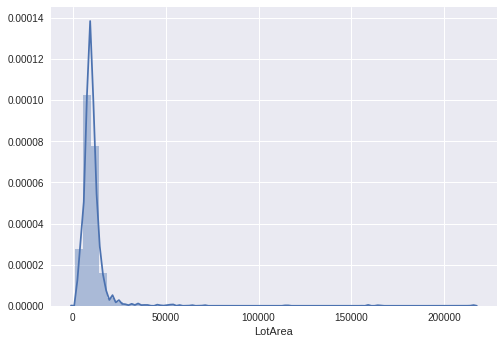

In [0]:
# Data Transformation
# Remove extreme outliers and normalize distributions
sns.distplot(train_data['LotArea']) # histogram of LotArea before log scaling

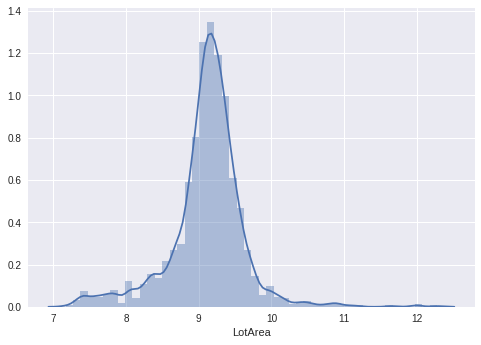

In [0]:
sns.distplot(np.log(train_data['LotArea'])) # histogram of LotArea after log scaling
train_data['LotArea'] = np.log(train_data['LotArea'])
train_data = train_data.drop(list(np.where(train_data['LotArea'] > 10.1)[0]), axis=0) # remove outliers in LotArea
train_data['1stFlrSF'] = np.log(train_data['1stFlrSF'])

In [0]:
# Drop Unecessary Features

columns_to_drop = []
# Dropping features that are of highly correlated pairs
columns_to_drop.append('GarageYrBlt')
columns_to_drop.append('MSSubClass')
columns_to_drop.append('Exterior2nd')
columns_to_drop.append('GarageCars')
columns_to_drop.append('BsmtFinType2')
columns_to_drop.append('TotalBsmtSF')
# columns_to_drop.append('TotRmsAbvGrd')   #1
# columns_to_drop.append('ExterQual')    #2
# columns_to_drop.append('Gar2')   #3
columns_to_drop.append('BsmtFinSF2')
columns_to_drop.append('Functional')
# Dropping obscure features
columns_to_drop.append('MSZoning')         
columns_to_drop.append('LowQualFinSF')
columns_to_drop.append('GarageCond')
columns_to_drop.append('MoSold')
# Dropping features with zero correlation to SalePrice
columns_to_drop.append('LotConfig')
columns_to_drop.append('Utilities')
columns_to_drop.append('LandContour')
columns_to_drop.append('Condition2')
columns_to_drop.append('MasVnrType')
columns_to_drop.append('MasVnrArea')
columns_to_drop.append('BsmtHalfBath')
# columns_to_drop.append('MiscVal')    #4
# columns_to_drop.append('YrSold')   #5
columns_to_drop.append('GasW')
columns_to_drop.append('OthW')
# columns_to_drop.append('Othr')    #6
columns_to_drop.append('Street')
columns_to_drop.append('LotFrontage')
columns_to_drop.append('MiscFeature')

train_data = train_data.drop(columns=columns_to_drop)

The 20 columns with the highest correlation with Sale Price:
['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'NridgHt', 'BsmtFinSF1', 'Foundation', 'LotArea', 'OpenPorchSF', 'NoRidge', '2ndFlrSF', 'WoodDeckSF', 'HalfBath', 'CentralAir']
Index(['SalePrice', 'Id', 'LotArea', 'Alley', 'LotShape', 'LandSlope',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual', 'PavedDrive',
 

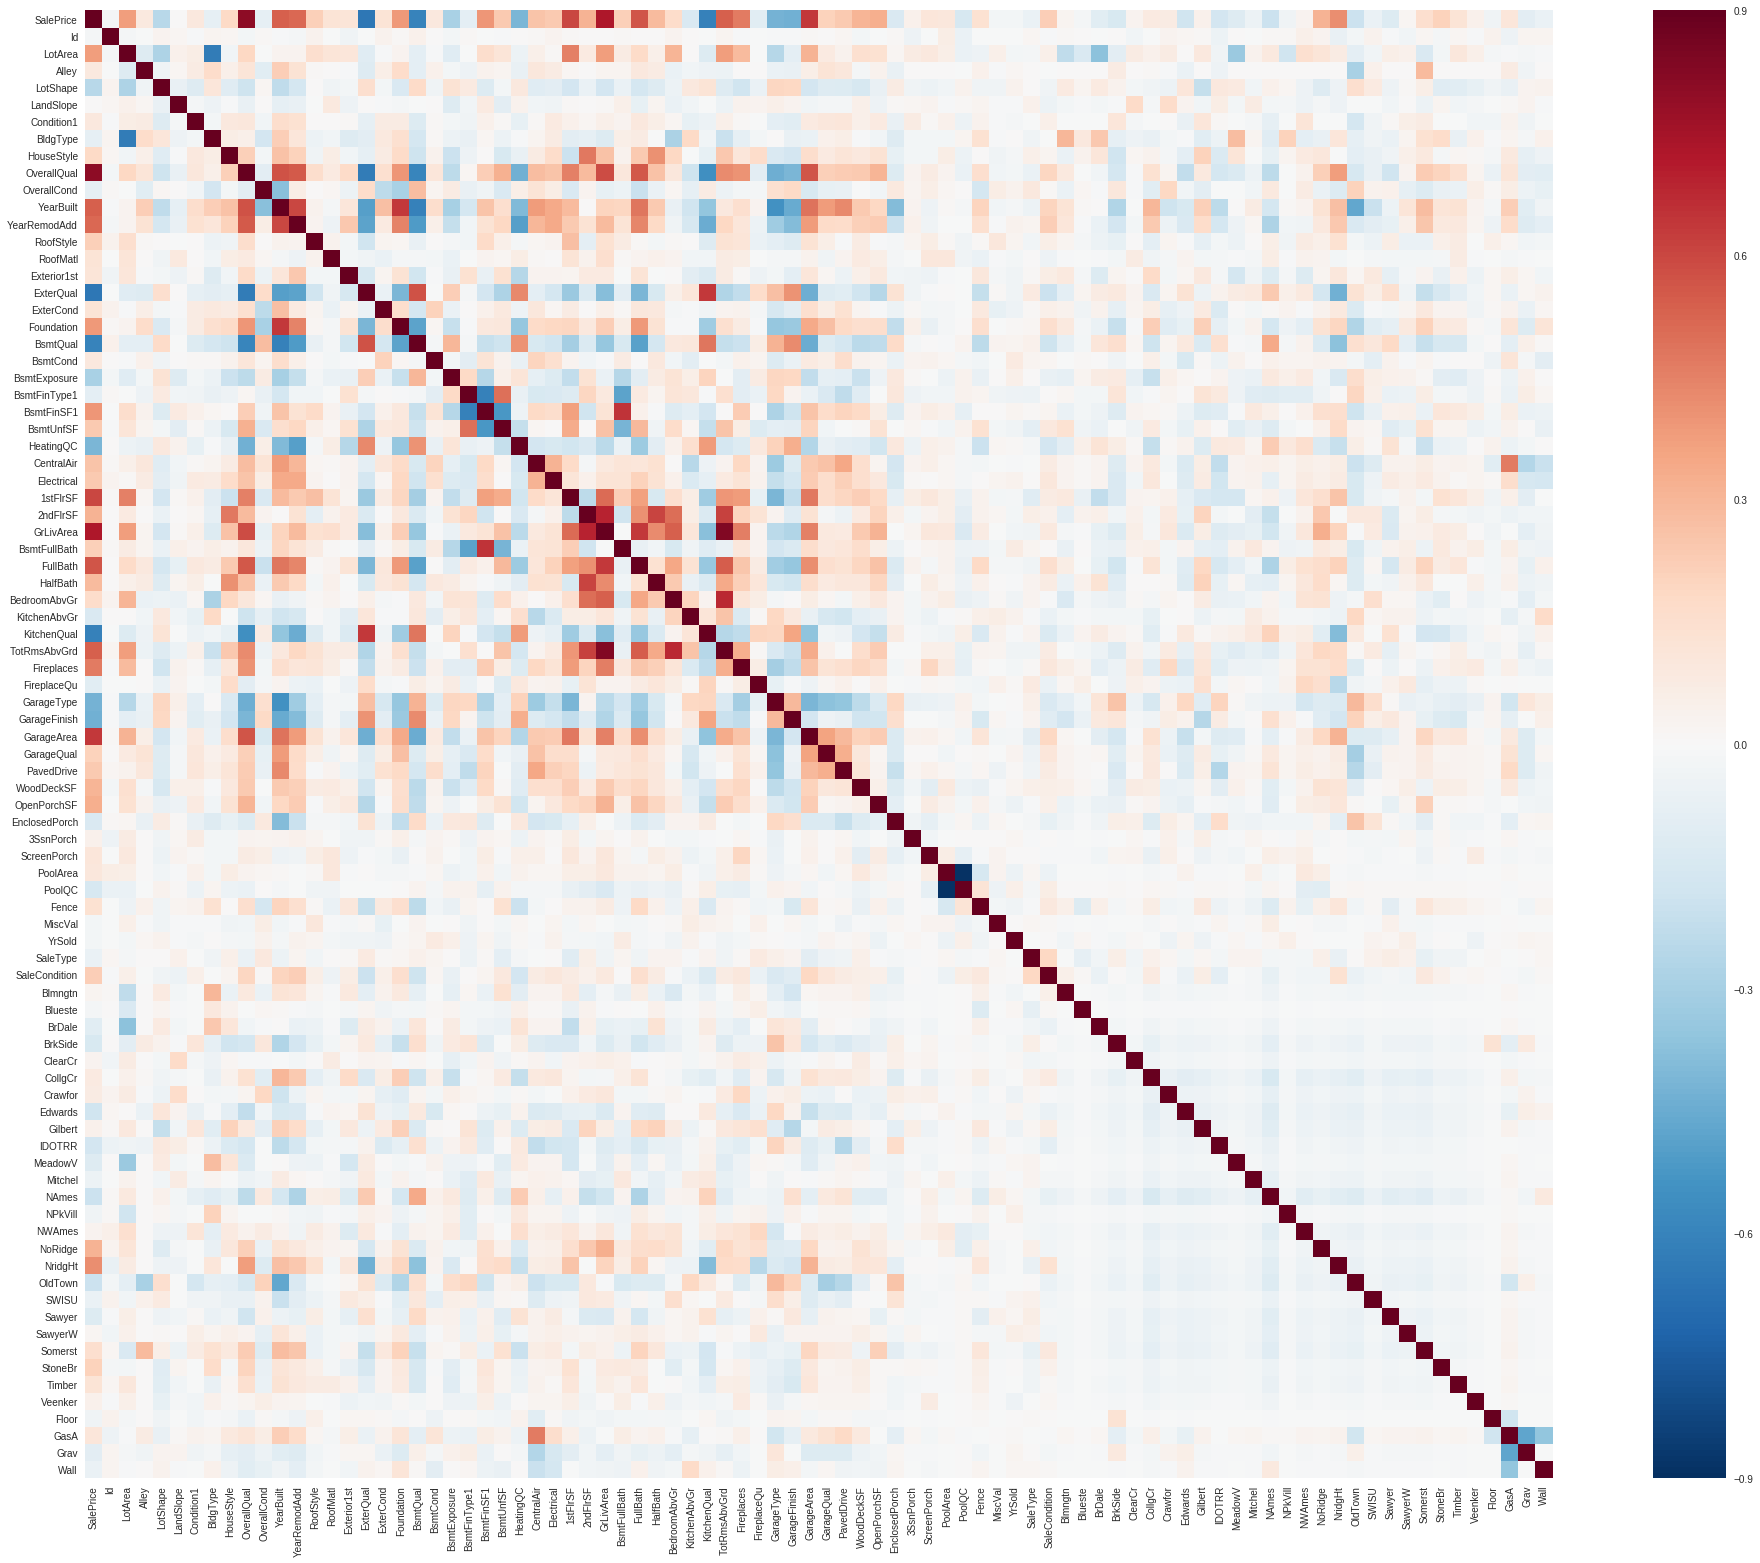

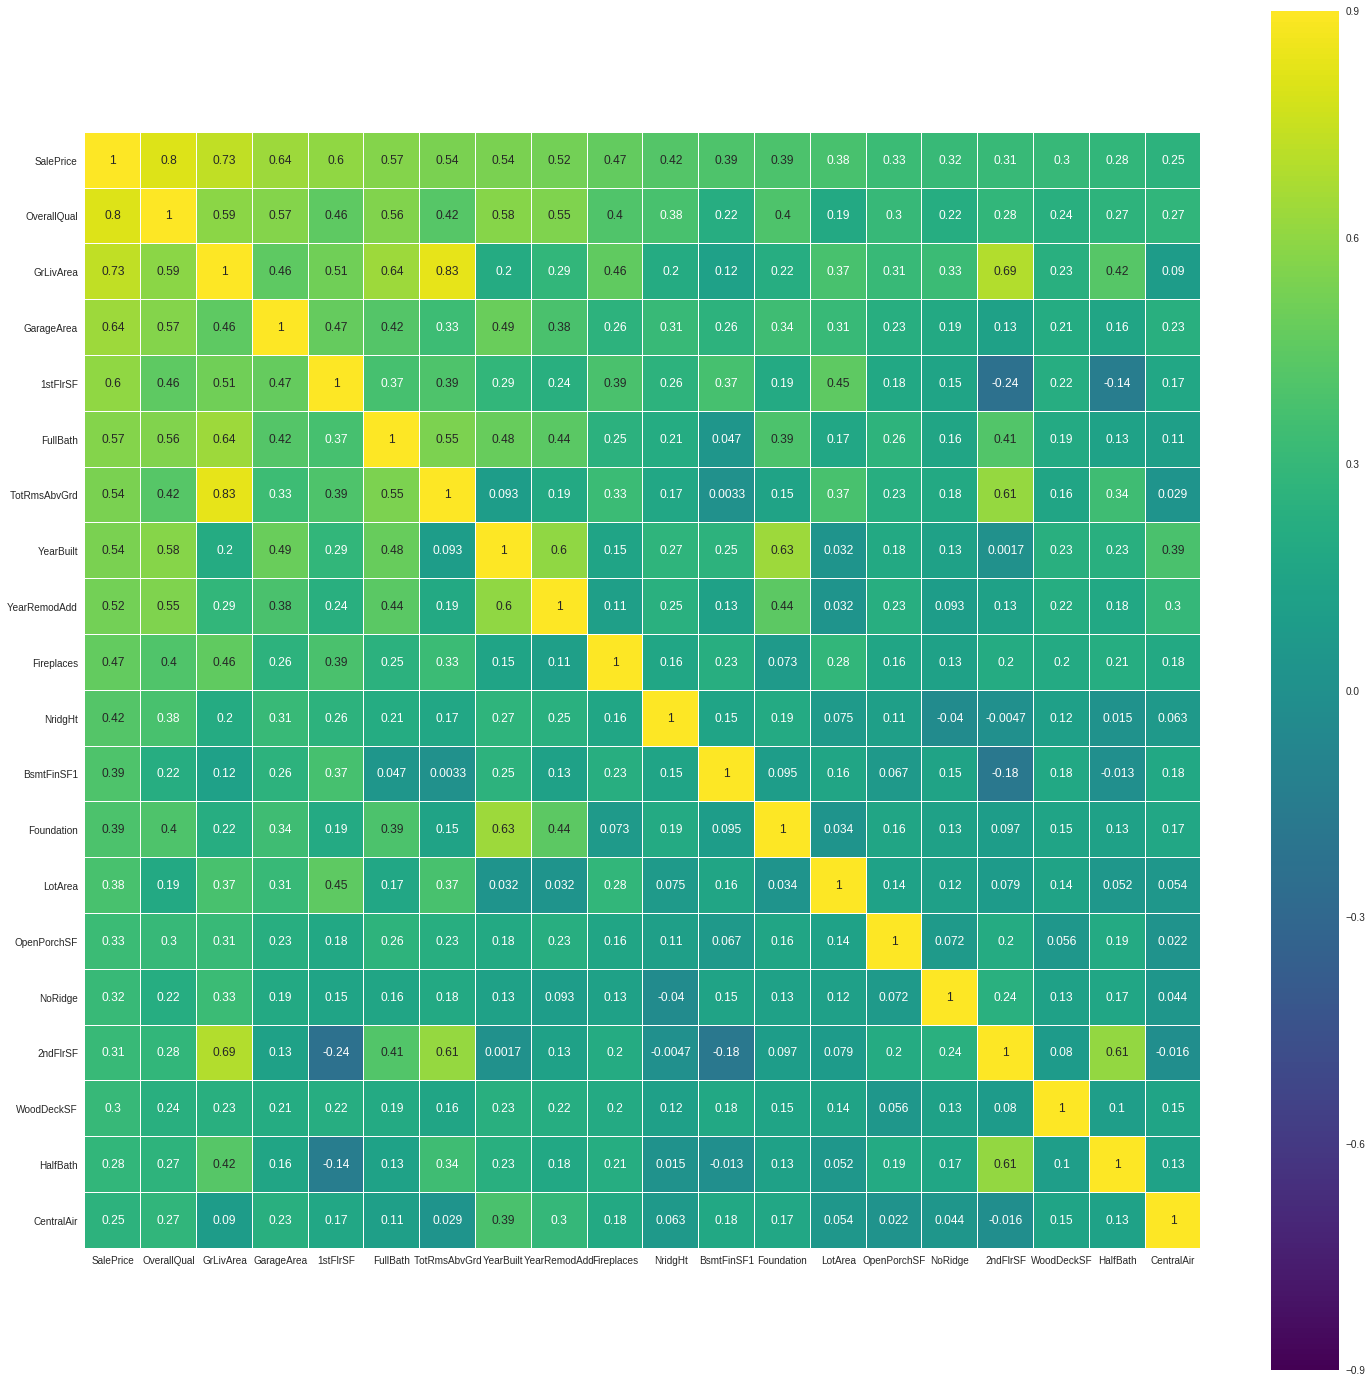

In [0]:
# Correlation Matrix to look at the pairwise correlation of the variables
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(36,27))
sns.heatmap(corrmat, vmax=0.9, square=True)   # top of correlation scale is 0.9 or higher

k = 20  # we'll look at the 20 largest correlations
correlation = train_data.corr()
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index

print('The', k, 'columns with the highest correlation with Sale Price:')
print(list(cols))   # the k variables that correlate most highly with SalePrice

cm = np.corrcoef(train_data[cols].values.T)
f , ax = plt.subplots(figsize = (25, 25))
sns.heatmap(cm, 
            vmax = .9, 
            linewidths = 0.01, 
            square = True, 
            annot = True, 
            cmap = 'viridis',
            linecolor = "white", 
            xticklabels = cols.values, 
            annot_kws = {'size': 12}, 
            yticklabels = cols.values)

print(train_data.columns)

In [0]:
# Training the Model
cols = train_data.columns.tolist()[2:] # 0 is SalePrice Column, 1 is Index Column
X = train_data[cols]
Y = train_data['SalePrice']

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.2, random_state=0)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)

print('Training set R^2 =', lm.score(X_train, Y_train))
print('Validation set R^2 =', lm.score(X_validation, Y_validation))

Training set R^2 = 0.9165873666055037
Validation set R^2 = 0.866850404531316
